In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


wine_data = datasets.load_wine()
print(wine_data['DESCR'])

X = wine_data['data']
y = wine_data['target']
X_scaled = StandardScaler().fit_transform(X)

print('data.shape\t',X.shape,
      '\ntarget.shape \t',y.shape)

datawine = pd.DataFrame(data= np.c_[X,y],columns= wine_data['feature_names'] + ['target'])
datawine

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [ ]:
def plot_sensitivity_perplexity(perplexities, X, y):
    fig, axes = plt.subplots(1, len(perplexities), figsize=(14, 5))
    for i, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate="auto", max_iter=1000, random_state=13)
        embedding = tsne.fit_transform(X)
        scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        axes[i].set_title(f'Perplexity = {perplexity}')
        axes[i].set_xlabel('t-SNE Dimension 1')
        axes[i].set_ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()


def plot_sensitivity_max_iter(max_iters, X, y):
    fig, axes = plt.subplots(1, len(max_iters), figsize=(14, 5))
    for i, max_iter in enumerate(max_iters):
        tsne = TSNE(n_components=2, perplexity=25, max_iter=max_iter, random_state=13)
        embedding = tsne.fit_transform(X)
        scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        axes[i].set_title(f'Iterations = {max_iter}')
        axes[i].set_xlabel('t-SNE Dimension 1')
        axes[i].set_ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

def plot_sensitivity_learning_rate(learning_rates, X, y):
    fig, axes = plt.subplots(1, len(learning_rates), figsize=(14, 5))
    for i, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=25, learning_rate=learning_rate, random_state=13)
        embedding = tsne.fit_transform(X)
        scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        axes[i].set_title(f'Learning Rate = {learning_rate}')
        axes[i].set_xlabel('t-SNE Dimension 1')
        axes[i].set_ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

def plot_sensitivity_early_exaggeration(early_exaggerations, X, y):
    fig, axes = plt.subplots(1, len(early_exaggerations), figsize=(14, 5))
    for i, early_exaggeration in enumerate(early_exaggerations):
        tsne = TSNE(n_components=2, perplexity=25, early_exaggeration=early_exaggeration, random_state=13)
        embedding = tsne.fit_transform(X)
        scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        axes[i].set_title(f'Early Exaggeration = {early_exaggeration}')
        axes[i].set_xlabel('t-SNE Dimension 1')
        axes[i].set_ylabel('t-SNE Dimension 2')
    plt.tight_layout()
    plt.show()

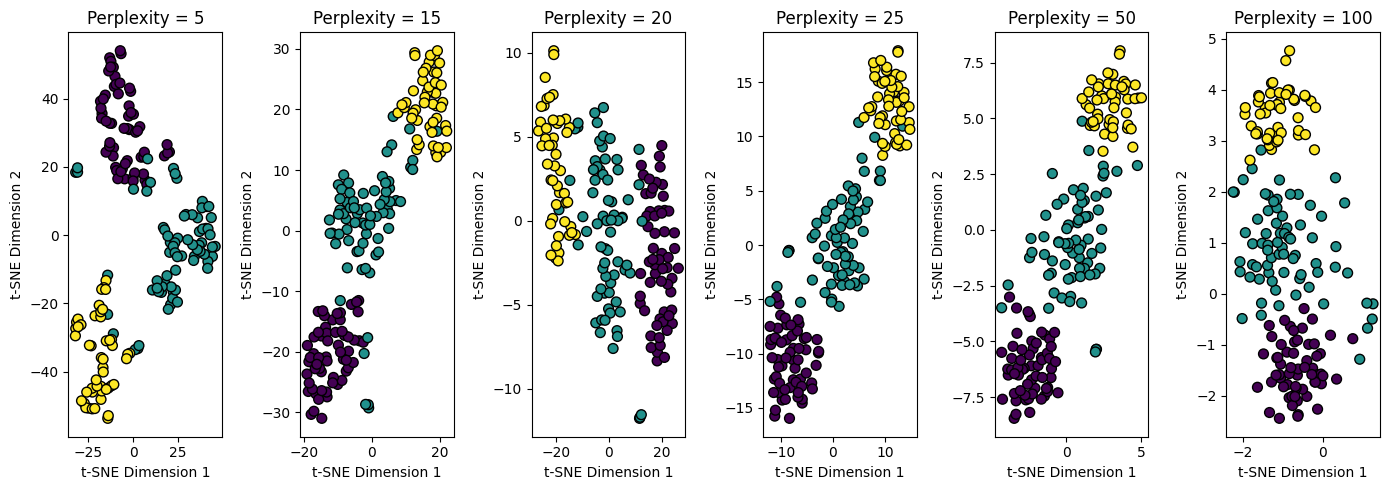

In [ ]:
perplexities =[5,15,20,25,50,100]
plot_sensitivity_perplexity(perplexities, X_scaled, y)

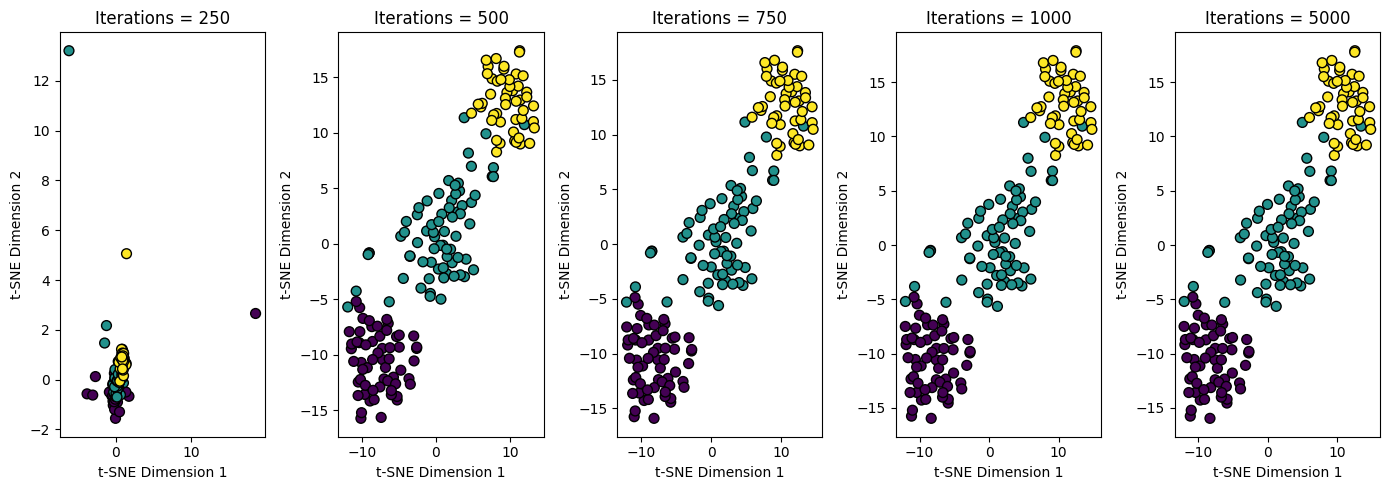

In [ ]:
max_iters =[250, 500, 750, 1000, 5000]
plot_sensitivity_max_iter(max_iters, X_scaled, y)

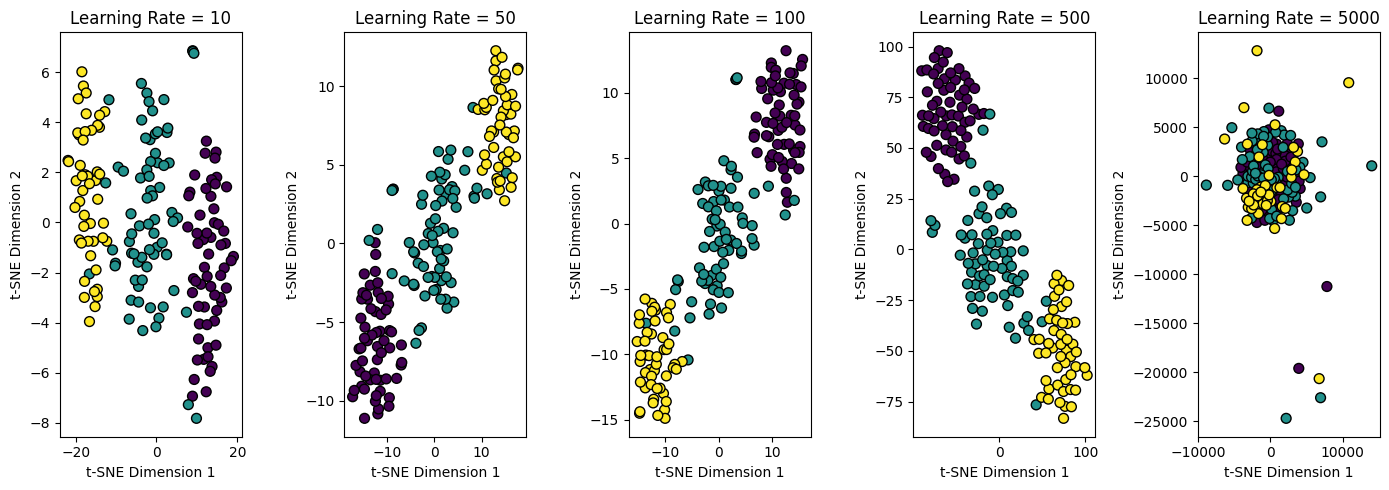

In [ ]:
learning_rates =[10,50,100,500,5000]
plot_sensitivity_learning_rate(learning_rates, X_scaled, y)

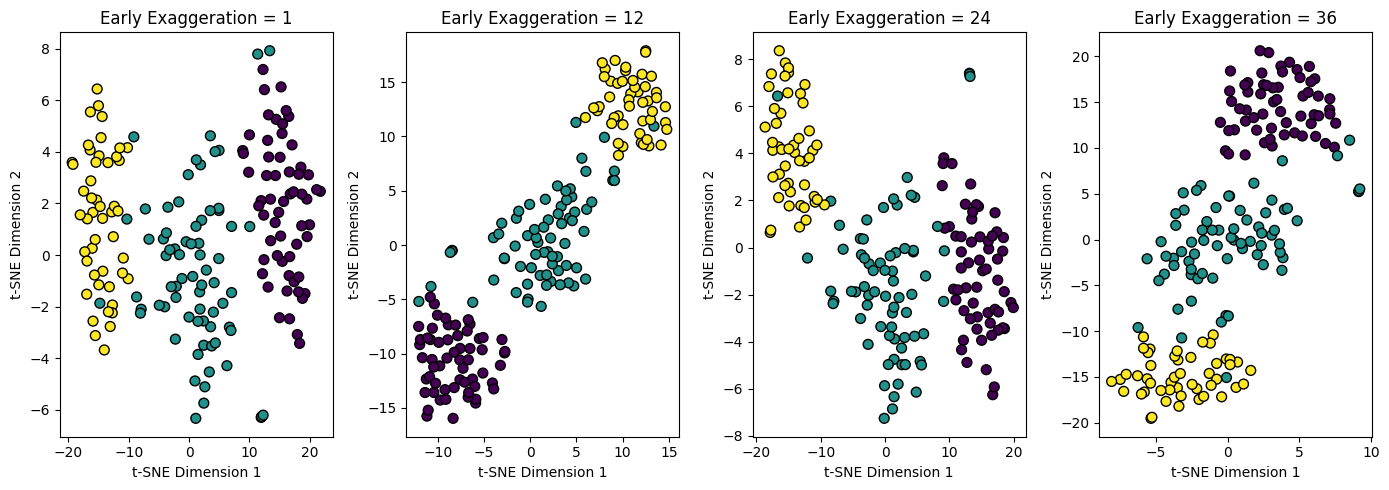

In [ ]:
early_exaggerations =[1, 12, 24, 36]
plot_sensitivity_early_exaggeration(early_exaggerations, X_scaled, y)